<a href="https://colab.research.google.com/github/JOELDAS1/joelsdas.2-gmail.com/blob/master/CNN_MNIST_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load tensorflow

In [ ]:
import tensorflow as tf

### Collect Data

In [ ]:
(trainX, trainY),(testX, testY) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
trainX.shape

(60000, 28, 28)

### Convert Output label to multiple values

In [ ]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

## Build the Graph

In [ ]:
#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()

#Reshape data from 2D (28,28) to 3D (28, 28, 1)
model.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,)))

#normalize data
model.add(tf.keras.layers.BatchNormalization())

### Apply Convolutional Layers, MaxPooling

In [ ]:
#Add first convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

#Add MaxPooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

### Add layers for Classification

In [ ]:
#Flatten the output
model.add(tf.keras.layers.Flatten())

#Dense layer
model.add(tf.keras.layers.Dense(128, activation='relu'))

#Add another dropout layer
model.add(tf.keras.layers.Dropout(0.25))

#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
             tf.keras.callbacks.ModelCheckpoint(filepath='MNIST_CNN_best_model.h5', monitor='val_loss', save_best_only=True)]


## Train the model

In [ ]:
#Train the model
history = model.fit(trainX,trainY,
                    validation_data=(testX,testY),
                    epochs=10,
                    callbacks = callbacks,
                    )

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1178 - accuracy: 0.9638 - val_loss: 0.0477 - val_accuracy: 0.9849
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0456 - accuracy: 0.9862 - val_loss: 0.0296 - val_accuracy: 0.9907
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0308 - accuracy: 0.9904 - val_loss: 0.0311 - val_accuracy: 0.9910
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0239 - accuracy: 0.9923 - val_loss: 0.0302 - val_accuracy: 0.9906
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0174 - accuracy: 0.9942 - val_loss: 0.0299 - val_accuracy: 0.9917


### Exploring History

In [ ]:
history

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history.history

{'accuracy': [0.9638333320617676,
  0.9861833453178406,
  0.9904333353042603,
  0.9923166632652283,
  0.9941999912261963],
 'loss': [0.11782389879226685,
  0.04561873525381088,
  0.030835801735520363,
  0.02386699803173542,
  0.01739954948425293],
 'val_accuracy': [0.9848999977111816,
  0.9907000064849854,
  0.9909999966621399,
  0.9905999898910522,
  0.9916999936103821],
 'val_loss': [0.047694701701402664,
  0.02962506376206875,
  0.03108815848827362,
  0.03020353987812996,
  0.0298568457365036]}

### Plotting history

In [ ]:
import matplotlib.pyplot as plt

Accuracy

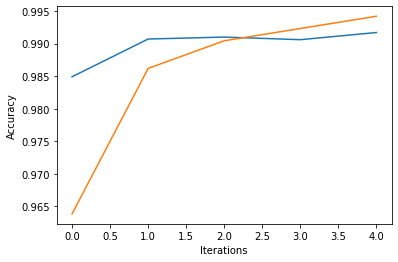

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()

Loss

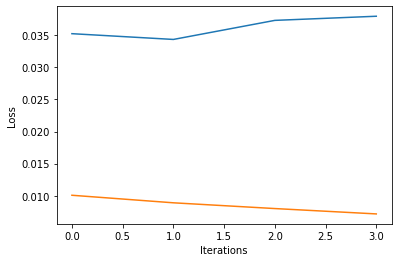

In [ ]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()